In [48]:
# 1. Import libraries / استيراد المكتبات
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  # import matplotlib for data visualization
plt.style.use('seaborn-v0_8') # use modern color style

1. Choose a dataset from Kaggle

In [49]:
# We selected two related datasets from Kaggle to analyze the relationship between social media usage and mental health.

# Screen Time and App Usage Dataset — contains information about user activity, time spent on apps, and screen time in minutes.

# Mental Health and Technology Usage Dataset — includes user demographics, mental health status, and technology usage habits.
# We merged both datasets using the screen time (in hours) as a common key to create a new combined dataset called new_merged_dataset.csv.
# This unified dataset helps explore how the amount of time spent on social media is linked to users’ mental health and daily digital behavior.

In [50]:
screen = pd.read_csv("screen_time_app_usage_dataset.csv")
mental = pd.read_csv("mental_health_and_technology_usage_2024.csv")

screen["Screen_Time_Hours"] = (screen["screen_time_min"] / 60).round(1)

merged = pd.merge(screen, mental, on="Screen_Time_Hours", how="inner")
merged.to_csv("new_merged_dataset.csv", index=False)


2. Load the dataset into a pandas DataFrame.

In [51]:
#2. Load the dataset into a pandas DataFrame. 
df = pd.read_csv("new_merged_dataset.csv")
df

user_id                           date  app_name   category  \
0        1064  2024-01-01 03:38:28.369456485    Chrome  Utilities   
1        1064  2024-01-01 03:38:28.369456485    Chrome  Utilities   
2        1064  2024-01-01 03:38:28.369456485    Chrome  Utilities   
3        1064  2024-01-01 03:38:28.369456485    Chrome  Utilities   
4        1064  2024-01-01 03:38:28.369456485    Chrome  Utilities   
...       ...                            ...       ...        ...   
2540     1038  2024-03-31 23:16:18.326108703  WhatsApp     Social   
2541     1038  2024-03-31 23:16:18.326108703  WhatsApp     Social   
2542     1038  2024-03-31 23:16:18.326108703  WhatsApp     Social   
2543     1038  2024-03-31 23:16:18.326108703  WhatsApp     Social   
2544     1038  2024-03-31 23:16:18.326108703  WhatsApp     Social   

      screen_time_min  launches  interactions  is_productive  youtube_views  \
0               85.15         2             5          False            NaN   
1               85.15         2             5          False            NaN   
2               85.15         2             5          False            NaN   
3               85.15         2             5          False            NaN   
4               85.15         2             5          False            NaN   
...               ...       ...           ...            ...            ...   
2540           149.72         3             5          False            NaN   
2541           149.72         3             5          False            NaN   
2542           149.72         3             5          False            NaN   
2543           149.72         3             5          False            NaN   
2544           149.72         3             5          False            NaN   

      youtube_likes  ...  Technology_Usage_Hours  Social_Media_Usage_Hours  \
0               NaN  ...                    7.58                      7.92   
1               NaN  ...                    8.28                      2.09   
2               NaN  ...                    1.20                      1.67   
3               NaN  ...                    6.95                      1.00   
4               NaN  ...                   10.57                      7.28   
...             ...  ...                     ...                       ...   
2540            NaN  ...                    3.97                      3.19   
2541            NaN  ...                   10.05                      4.69   
2542            NaN  ...                    1.81                      5.54   
2543            NaN  ...                    1.95                      5.59   
2544            NaN  ...                    9.75                      4.02   

      Gaming_Hours  Mental_Health_Status  Stress_Level  Sleep_Hours  \
0             1.62                  Fair           Low         5.20   
1             4.14                  Fair          High         5.61   
2             1.57             Excellent          High         7.29   
3             3.28                  Fair           Low         6.85   
4             3.45                  Fair           Low         5.65   
...            ...                   ...           ...          ...   
2540          4.85                  Fair           Low         8.98   
2541          3.58                  Fair           Low         6.76   
2542          3.52                  Fair        Medium         6.59   
2543          3.46                  Good        Medium         6.03   
2544          2.33                  Good           Low         5.54   

      Physical_Activity_Hours  Support_Systems_Access  \
0                        7.24                      No   
1                        5.08                      No   
2                        9.64                     Yes   
3                        4.66                     Yes   
4                        9.81                      No   
...                       ...                     ...   
2540                     5.34          

3. Perform data cleaning and preprocessing: 

In [52]:
# Shows all column names in the DataFrame
df.columns

Index(['user_id', 'date', 'app_name', 'category', 'screen_time_min',
       'launches', 'interactions', 'is_productive', 'youtube_views',
       'youtube_likes', 'youtube_comments', 'extra_col_11', 'extra_col_12',
       'extra_col_13', 'extra_col_14', 'extra_col_15', 'extra_col_16',
       'extra_col_17', 'extra_col_18', 'extra_col_19', 'extra_col_20',
       'extra_col_21', 'extra_col_22', 'extra_col_23', 'Screen_Time_Hours',
       'User_ID', 'Age', 'Gender', 'Technology_Usage_Hours',
       'Social_Media_Usage_Hours', 'Gaming_Hours', 'Mental_Health_Status',
       'Stress_Level', 'Sleep_Hours', 'Physical_Activity_Hours',
       'Support_Systems_Access', 'Work_Environment_Impact',
       'Online_Support_Usage'],
      dtype='object')

In [53]:
# quick count of missing values per column
df.isnull().sum() 

user_id                        0
date                           0
app_name                       0
category                       0
screen_time_min                0
launches                       0
interactions                   0
is_productive                  0
youtube_views               2386
youtube_likes               2386
youtube_comments            2386
extra_col_11                   0
extra_col_12                   0
extra_col_13                   0
extra_col_14                   0
extra_col_15                   0
extra_col_16                   0
extra_col_17                   0
extra_col_18                   0
extra_col_19                   0
extra_col_20                   0
extra_col_21                   0
extra_col_22                   0
extra_col_23                   0
Screen_Time_Hours              0
User_ID                        0
Age                            0
Gender                         0
Technology_Usage_Hours         0
Social_Media_Usage_Hours       0
Gaming_Hou

In [54]:
# Drop empty columns
df.dropna(axis=1, how='all', inplace=True)
df

user_id                           date  app_name   category  \
0        1064  2024-01-01 03:38:28.369456485    Chrome  Utilities   
1        1064  2024-01-01 03:38:28.369456485    Chrome  Utilities   
2        1064  2024-01-01 03:38:28.369456485    Chrome  Utilities   
3        1064  2024-01-01 03:38:28.369456485    Chrome  Utilities   
4        1064  2024-01-01 03:38:28.369456485    Chrome  Utilities   
...       ...                            ...       ...        ...   
2540     1038  2024-03-31 23:16:18.326108703  WhatsApp     Social   
2541     1038  2024-03-31 23:16:18.326108703  WhatsApp     Social   
2542     1038  2024-03-31 23:16:18.326108703  WhatsApp     Social   
2543     1038  2024-03-31 23:16:18.326108703  WhatsApp     Social   
2544     1038  2024-03-31 23:16:18.326108703  WhatsApp     Social   

      screen_time_min  launches  interactions  is_productive  youtube_views  \
0               85.15         2             5          False            NaN   
1               85.15         2             5          False            NaN   
2               85.15         2             5          False            NaN   
3               85.15         2             5          False            NaN   
4               85.15         2             5          False            NaN   
...               ...       ...           ...            ...            ...   
2540           149.72         3             5          False            NaN   
2541           149.72         3             5          False            NaN   
2542           149.72         3             5          False            NaN   
2543           149.72         3             5          False            NaN   
2544           149.72         3             5          False            NaN   

      youtube_likes  ...  Technology_Usage_Hours  Social_Media_Usage_Hours  \
0               NaN  ...                    7.58                      7.92   
1               NaN  ...                    8.28                      2.09   
2               NaN  ...                    1.20                      1.67   
3               NaN  ...                    6.95                      1.00   
4               NaN  ...                   10.57                      7.28   
...             ...  ...                     ...                       ...   
2540            NaN  ...                    3.97                      3.19   
2541            NaN  ...                   10.05                      4.69   
2542            NaN  ...                    1.81                      5.54   
2543            NaN  ...                    1.95                      5.59   
2544            NaN  ...                    9.75                      4.02   

      Gaming_Hours  Mental_Health_Status  Stress_Level  Sleep_Hours  \
0             1.62                  Fair           Low         5.20   
1             4.14                  Fair          High         5.61   
2             1.57             Excellent          High         7.29   
3             3.28                  Fair           Low         6.85   
4             3.45                  Fair           Low         5.65   
...            ...                   ...           ...          ...   
2540          4.85                  Fair           Low         8.98   
2541          3.58                  Fair           Low         6.76   
2542          3.52                  Fair        Medium         6.59   
2543          3.46                  Good        Medium         6.03   
2544          2.33                  Good           Low         5.54   

      Physical_Activity_Hours  Support_Systems_Access  \
0                        7.24                      No   
1                        5.08                      No   
2                        9.64                     Yes   
3                        4.66                     Yes   
4                        9.81                      No   
...                       ...                     ...   
2540                     5.34          

In [55]:
# Removes extra spaces from column names and text values  
# يحذف المسافات الزائدة من أسماء الأعمدة والقيم النصية
# Strip spaces
df.columns = df.columns.str.strip()
for c in df.select_dtypes(include='object').columns:
    df[c] = df[c].str.strip()

In [56]:
# Drop duplicates
df.drop_duplicates(inplace=True)

In [57]:
# quick count of missing values per column
df.isnull().sum()

user_id                        0
date                           0
app_name                       0
category                       0
screen_time_min                0
launches                       0
interactions                   0
is_productive                  0
youtube_views               2386
youtube_likes               2386
youtube_comments            2386
extra_col_11                   0
extra_col_12                   0
extra_col_13                   0
extra_col_14                   0
extra_col_15                   0
extra_col_16                   0
extra_col_17                   0
extra_col_18                   0
extra_col_19                   0
extra_col_20                   0
extra_col_21                   0
extra_col_22                   0
extra_col_23                   0
Screen_Time_Hours              0
User_ID                        0
Age                            0
Gender                         0
Technology_Usage_Hours         0
Social_Media_Usage_Hours       0
Gaming_Hou

In [58]:
# # Fill missing values using mean for numeric and mode for text columns
for c in df.columns:
    if df[c].dtype == 'object':
        df[c] = df[c].fillna(df[c].mode()[0])
    else:
        df[c] = df[c].fillna(df[c].mean())

In [59]:
df.isnull().sum()  # if there is any missing values per column?

user_id                     0
date                        0
app_name                    0
category                    0
screen_time_min             0
launches                    0
interactions                0
is_productive               0
youtube_views               0
youtube_likes               0
youtube_comments            0
extra_col_11                0
extra_col_12                0
extra_col_13                0
extra_col_14                0
extra_col_15                0
extra_col_16                0
extra_col_17                0
extra_col_18                0
extra_col_19                0
extra_col_20                0
extra_col_21                0
extra_col_22                0
extra_col_23                0
Screen_Time_Hours           0
User_ID                     0
Age                         0
Gender                      0
Technology_Usage_Hours      0
Social_Media_Usage_Hours    0
Gaming_Hours                0
Mental_Health_Status        0
Stress_Level                0
Sleep_Hour

In [60]:
# Convert all column names to lowercase for consistent formatting
df.columns = df.columns.str.lower()
df

user_id                           date  app_name   category  \
0        1064  2024-01-01 03:38:28.369456485    Chrome  Utilities   
1        1064  2024-01-01 03:38:28.369456485    Chrome  Utilities   
2        1064  2024-01-01 03:38:28.369456485    Chrome  Utilities   
3        1064  2024-01-01 03:38:28.369456485    Chrome  Utilities   
4        1064  2024-01-01 03:38:28.369456485    Chrome  Utilities   
...       ...                            ...       ...        ...   
2540     1038  2024-03-31 23:16:18.326108703  WhatsApp     Social   
2541     1038  2024-03-31 23:16:18.326108703  WhatsApp     Social   
2542     1038  2024-03-31 23:16:18.326108703  WhatsApp     Social   
2543     1038  2024-03-31 23:16:18.326108703  WhatsApp     Social   
2544     1038  2024-03-31 23:16:18.326108703  WhatsApp     Social   

      screen_time_min  launches  interactions  is_productive  youtube_views  \
0               85.15         2             5          False  232223.415094   
1               85.15         2             5          False  232223.415094   
2               85.15         2             5          False  232223.415094   
3               85.15         2             5          False  232223.415094   
4               85.15         2             5          False  232223.415094   
...               ...       ...           ...            ...            ...   
2540           149.72         3             5          False  232223.415094   
2541           149.72         3             5          False  232223.415094   
2542           149.72         3             5          False  232223.415094   
2543           149.72         3             5          False  232223.415094   
2544           149.72         3             5          False  232223.415094   

      youtube_likes  ...  technology_usage_hours  social_media_usage_hours  \
0      12724.830189  ...                    7.58                      7.92   
1      12724.830189  ...                    8.28                      2.09   
2      12724.830189  ...                    1.20                      1.67   
3      12724.830189  ...                    6.95                      1.00   
4      12724.830189  ...                   10.57                      7.28   
...             ...  ...                     ...                       ...   
2540   12724.830189  ...                    3.97                      3.19   
2541   12724.830189  ...                   10.05                      4.69   
2542   12724.830189  ...                    1.81                      5.54   
2543   12724.830189  ...                    1.95                      5.59   
2544   12724.830189  ...                    9.75                      4.02   

      gaming_hours  mental_health_status  stress_level  sleep_hours  \
0             1.62                  Fair           Low         5.20   
1             4.14                  Fair          High         5.61   
2             1.57             Excellent          High         7.29   
3             3.28                  Fair           Low         6.85   
4             3.45                  Fair           Low         5.65   
...            ...                   ...           ...          ...   
2540          4.85                  Fair           Low         8.98   
2541          3.58                  Fair           Low         6.76   
2542          3.52                  Fair        Medium         6.59   
2543          3.46                  Good        Medium         6.03   
2544          2.33                  Good           Low         5.54   

      physical_activity_hours  support_systems_access  \
0                        7.24                      No   
1                        5.08                      No   
2                        9.64                     Yes   
3                        4.66                     Yes   
4                        9.81                      No   
...                       ...                     ...   
2540                     5.34          

In [126]:
# Check data types of all columns to ensure correct formats before analysis
df.dtypes

user_id                              int64
date                        datetime64[ns]
app_name                            object
category                            object
screen_time_min                    float64
launches                             int64
interactions                         int64
is_productive                         bool
youtube_views                      float64
youtube_likes                      float64
youtube_comments                   float64
screen_time_hours                  float64
user_id                             object
age                                  Int64
gender                              object
technology_usage_hours             float64
social_media_usage_hours           float64
gaming_hours                       float64
mental_health_status                object
stress_level                        object
sleep_hours                        float64
physical_activity_hours            float64
support_systems_access              object
work_enviro

In [61]:
# Convert 'date' to datetime and 'age' to numeric type to ensure accurate analysis
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'], errors='coerce')

if 'age' in df.columns:
    df['age'] = pd.to_numeric(df['age'], errors='coerce').astype('Int64')

In [62]:
# Display dataset summary after cleaning to verify data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2545 entries, 0 to 2544
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   user_id                   2545 non-null   int64         
 1   date                      2545 non-null   datetime64[ns]
 2   app_name                  2545 non-null   object        
 3   category                  2545 non-null   object        
 4   screen_time_min           2545 non-null   float64       
 5   launches                  2545 non-null   int64         
 6   interactions              2545 non-null   int64         
 7   is_productive             2545 non-null   bool          
 8   youtube_views             2545 non-null   float64       
 9   youtube_likes             2545 non-null   float64       
 10  youtube_comments          2545 non-null   float64       
 11  extra_col_11              2545 non-null   float64       
 12  extra_col_12        

In [63]:
#Check for missing values
df.isnull().sum()

user_id                     0
date                        0
app_name                    0
category                    0
screen_time_min             0
launches                    0
interactions                0
is_productive               0
youtube_views               0
youtube_likes               0
youtube_comments            0
extra_col_11                0
extra_col_12                0
extra_col_13                0
extra_col_14                0
extra_col_15                0
extra_col_16                0
extra_col_17                0
extra_col_18                0
extra_col_19                0
extra_col_20                0
extra_col_21                0
extra_col_22                0
extra_col_23                0
screen_time_hours           0
user_id                     0
age                         0
gender                      0
technology_usage_hours      0
social_media_usage_hours    0
gaming_hours                0
mental_health_status        0
stress_level                0
sleep_hour

In [64]:
# Drop unnecessary or extra columns from the dataset
df.drop(columns=['extra_col_11','extra_col_12','extra_col_13','extra_col_14',
                 'extra_col_15','extra_col_16','extra_col_17','extra_col_18',
                 'extra_col_19','extra_col_20','extra_col_21','extra_col_22',
                 'extra_col_23'], inplace=True, errors='ignore')
df

user_id                          date  app_name   category  \
0        1064 2024-01-01 03:38:28.369456485    Chrome  Utilities   
1        1064 2024-01-01 03:38:28.369456485    Chrome  Utilities   
2        1064 2024-01-01 03:38:28.369456485    Chrome  Utilities   
3        1064 2024-01-01 03:38:28.369456485    Chrome  Utilities   
4        1064 2024-01-01 03:38:28.369456485    Chrome  Utilities   
...       ...                           ...       ...        ...   
2540     1038 2024-03-31 23:16:18.326108703  WhatsApp     Social   
2541     1038 2024-03-31 23:16:18.326108703  WhatsApp     Social   
2542     1038 2024-03-31 23:16:18.326108703  WhatsApp     Social   
2543     1038 2024-03-31 23:16:18.326108703  WhatsApp     Social   
2544     1038 2024-03-31 23:16:18.326108703  WhatsApp     Social   

      screen_time_min  launches  interactions  is_productive  youtube_views  \
0               85.15         2             5          False  232223.415094   
1               85.15         2             5          False  232223.415094   
2               85.15         2             5          False  232223.415094   
3               85.15         2             5          False  232223.415094   
4               85.15         2             5          False  232223.415094   
...               ...       ...           ...            ...            ...   
2540           149.72         3             5          False  232223.415094   
2541           149.72         3             5          False  232223.415094   
2542           149.72         3             5          False  232223.415094   
2543           149.72         3             5          False  232223.415094   
2544           149.72         3             5          False  232223.415094   

      youtube_likes  ...  technology_usage_hours  social_media_usage_hours  \
0      12724.830189  ...                    7.58                      7.92   
1      12724.830189  ...                    8.28                      2.09   
2      12724.830189  ...                    1.20                      1.67   
3      12724.830189  ...                    6.95                      1.00   
4      12724.830189  ...                   10.57                      7.28   
...             ...  ...                     ...                       ...   
2540   12724.830189  ...                    3.97                      3.19   
2541   12724.830189  ...                   10.05                      4.69   
2542   12724.830189  ...                    1.81                      5.54   
2543   12724.830189  ...                    1.95                      5.59   
2544   12724.830189  ...                    9.75                      4.02   

     gaming_hours  mental_health_status stress_level  sleep_hours  \
0            1.62                  Fair          Low         5.20   
1            4.14                  Fair         High         5.61   
2            1.57             Excellent         High         7.29   
3            3.28                  Fair          Low         6.85   
4            3.45                  Fair          Low         5.65   
...           ...                   ...          ...          ...   
2540         4.85                  Fair          Low         8.98   
2541         3.58                  Fair          Low         6.76   
2542         3.52                  Fair       Medium         6.59   
2543         3.46                  Good       Medium         6.03   
2544         2.33                  Good          Low         5.54   

      physical_activity_hours  support_systems_access work_environment_impact  \
0                        7.24                      No                 Neutral   
1                        5.08                      No                 Neutral   
2                        9.64                     Yes                Positive   
3                        4.66                     Yes                 Neutral   
4                        9.81                      No                

In [65]:
# Select a random sample of 1000 rows to simplify analysis and reduce dataset size
df = df.sample(n=1000, random_state=42) 
print("10,000 rows kept successfully.")  
print("New shape:", df.shape)       

10,000 rows kept successfully.
New shape: (1000, 25)


In [66]:
# Display dataset shape after cleaning to confirm final number of rows and columns
print("Shape after cleaning:", df.shape)

Shape after cleaning: (1000, 25)


4. Perform data analysis using pandas:

In [67]:
# Show the first 5 rows of the dataset to preview data after cleaning
df.head()  

user_id                          date     app_name      category  \
56       1081 2024-01-04 22:40:17.605868622        Slack  Productivity   
610      1053 2024-01-24 16:01:45.635211737    Instagram        Social   
1662     1079 2024-03-04 03:28:23.367789263       Notion  Productivity   
1010     1076 2024-02-06 12:04:33.691230410     WhatsApp        Social   
2416     1034 2024-03-27 18:46:27.329109703  Google Docs  Productivity   

      screen_time_min  launches  interactions  is_productive  youtube_views  \
56              61.13         1             3           True  232223.415094   
610             74.35         1             2          False  232223.415094   
1662           112.84         1             5           True  232223.415094   
1010            61.69         5             6          False  232223.415094   
2416           106.11         0             5           True  232223.415094   

      youtube_likes  ...  technology_usage_hours  social_media_usage_hours  \
56     12724.830189  ...                    8.31                      0.93   
610    12724.830189  ...                   11.09                      6.96   
1662   12724.830189  ...                    4.77                      7.20   
1010   12724.830189  ...                    2.41                      4.09   
2416   12724.830189  ...                    3.84                      1.28   

     gaming_hours  mental_health_status stress_level  sleep_hours  \
56           1.51                  Fair          Low         4.66   
610          4.17                  Poor       Medium         7.10   
1662         3.25                  Fair       Medium         6.57   
1010         4.39                  Poor       Medium         6.21   
2416         1.78                  Good         High         5.39   

      physical_activity_hours  support_systems_access work_environment_impact  \
56                       4.93                      No                Negative   
610                      1.29                     Yes                Negative   
1662                     5.77                      No                Positive   
1010                     0.33                     Yes                Positive   
2416                     4.45                     Yes                 Neutral   

     online_support_usage  
56                     No  
610                    No  
1662                   No  
1010                   No  
2416                   No  

[5 rows x 25 columns]

In [68]:
# Show the first 10 rows of the dataset to review a larger data sample
df.head(10)

user_id                          date     app_name       category  \
56       1081 2024-01-04 22:40:17.605868622        Slack   Productivity   
610      1053 2024-01-24 16:01:45.635211737    Instagram         Social   
1662     1079 2024-03-04 03:28:23.367789263       Notion   Productivity   
1010     1076 2024-02-06 12:04:33.691230410     WhatsApp         Social   
2416     1034 2024-03-27 18:46:27.329109703  Google Docs   Productivity   
859      1089 2024-02-01 02:26:55.738579526  Google Docs   Productivity   
1255     1080 2024-02-17 00:02:52.857619206     Snapchat         Social   
1381     1099 2024-02-21 13:17:03.941313771        Gmail      Utilities   
194      1015 2024-01-08 22:04:16.885628542      YouTube  Entertainment   
387      1096 2024-01-15 20:50:20.206735578      Twitter         Social   

      screen_time_min  launches  interactions  is_productive  youtube_views  \
56              61.13         1             3           True  232223.415094   
610             74.35         1             2          False  232223.415094   
1662           112.84         1             5           True  232223.415094   
1010            61.69         5             6          False  232223.415094   
2416           106.11         0             5           True  232223.415094   
859             90.26         1             4           True  232223.415094   
1255           108.19         1             1          False  232223.415094   
1381            60.27         2             7          False  232223.415094   
194             71.70         1             4          False  218648.000000   
387             86.34         5             5          False  232223.415094   

      youtube_likes  ...  technology_usage_hours  social_media_usage_hours  \
56     12724.830189  ...                    8.31                      0.93   
610    12724.830189  ...                   11.09                      6.96   
1662   12724.830189  ...                    4.77                      7.20   
1010   12724.830189  ...                    2.41                      4.09   
2416   12724.830189  ...                    3.84                      1.28   
859    12724.830189  ...                    2.88                      5.71   
1255   12724.830189  ...                    1.68                      6.02   
1381   12724.830189  ...                    1.74                      6.10   
194    19866.000000  ...                    3.06                      0.82   
387    12724.830189  ...                    7.58                      7.92   

     gaming_hours  mental_health_status stress_level  sleep_hours  \
56           1.51                  Fair          Low         4.66   
610          4.17                  Poor       Medium         7.10   
1662         3.25                  Fair       Medium         6.57   
1010         4.39                  Poor       Medium         6.21   
2416         1.78                  Good         High         5.39   
859          2.52                  Fair       Medium         8.36   
1255         0.39                  Fair         High         5.08   
1381         4.81                  Good       Medium         4.06   
194          2.76             Excellent          Low         4.41   
387          1.62                  Fair          Low         5.20   

      physical_activity_hours  support_systems_access work_environment_impact  \
56                       4.93                      No                Negative   
610                      1.29                     Yes                Negative   
1662                     5.77                      No                Positive   
1010                     0.33                     Yes                Positive   
2416                     4.45                     Yes                 Neutral   
859                      2.74                      No                Negative   
1255                     6.39                     Yes                Positive   
1381                     2.55              

In [128]:
# Show the last 5 rows of the dataset to review the end of the table
df.tail()  

user_id                          date         app_name       category  \
2501     1041 2024-03-30 18:52:13.044348116          Twitter         Social   
483      1083 2024-01-19 06:24:07.682560853  Microsoft Teams   Productivity   
2427     1080 2024-03-27 20:57:32.350783595           Twitch  Entertainment   
915      1060 2024-02-03 14:09:52.997665888          Netflix  Entertainment   
1517     1003 2024-02-27 05:27:56.958986329           Chrome      Utilities   

      screen_time_min  launches  interactions  is_productive  youtube_views  \
2501            74.26         2             6          False  232223.415094   
483             66.59         1             2           True  232223.415094   
2427            73.40         1             6          False  232223.415094   
915             58.67         3             5          False  232223.415094   
1517           185.65         1             4          False  232223.415094   

      youtube_likes  ...  sleep_hours  physical_activity_hours  \
2501   12724.830189  ...         6.16                     8.90   
483    12724.830189  ...         7.90                     6.11   
2427   12724.830189  ...         5.85                     2.87   
915    12724.830189  ...         4.06                     2.55   
1517   12724.830189  ...         6.27                     7.84   

     support_systems_access  work_environment_impact online_support_usage  \
2501                     No                 Negative                  Yes   
483                      No                  Neutral                  Yes   
2427                     No                 Positive                   No   
915                      No                 Negative                  Yes   
1517                     No                  Neutral                  Yes   

      heavy_user    total_usage  stress_level_num digital_wellbeing_index  \
2501           0  248589.474843                 1                1.055000   
483            0  248596.634843                 2                1.430000   
2427           0  248598.304843                 3               -0.502500   
915            0  248571.904843                 2               -0.680000   
1517           1  248652.194843                 2               -0.066667   

     work_environment_num  
2501                   -1  
483                     0  
2427                    1  
915                    -1  
1517                    0  

[5 rows x 30 columns]

In [70]:
# Show the total number of rows and columns in the dataset
df.shape

(1000, 25)

In [71]:
# List all column names in the dataset
df.columns 

Index(['user_id', 'date', 'app_name', 'category', 'screen_time_min',
       'launches', 'interactions', 'is_productive', 'youtube_views',
       'youtube_likes', 'youtube_comments', 'screen_time_hours', 'user_id',
       'age', 'gender', 'technology_usage_hours', 'social_media_usage_hours',
       'gaming_hours', 'mental_health_status', 'stress_level', 'sleep_hours',
       'physical_activity_hours', 'support_systems_access',
       'work_environment_impact', 'online_support_usage'],
      dtype='object')

In [72]:
# Display detailed info about columns, data types, non-null counts, and memory usage
df.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 56 to 1517
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   user_id                   1000 non-null   int64         
 1   date                      1000 non-null   datetime64[ns]
 2   app_name                  1000 non-null   object        
 3   category                  1000 non-null   object        
 4   screen_time_min           1000 non-null   float64       
 5   launches                  1000 non-null   int64         
 6   interactions              1000 non-null   int64         
 7   is_productive             1000 non-null   bool          
 8   youtube_views             1000 non-null   float64       
 9   youtube_likes             1000 non-null   float64       
 10  youtube_comments          1000 non-null   float64       
 11  screen_time_hours         1000 non-null   float64       
 12  user_id                 

In [73]:
# show basic statistics for numeric columns (mean, std, min, max, etc.)
df.describe()

user_id                           date  screen_time_min  launches  \
count  1000.00000                           1000      1000.000000  1000.000   
mean   1049.62800  2024-02-16 17:55:32.445214976        93.594860     2.018   
min    1000.00000  2024-01-01 05:05:51.717239079        57.060000     0.000   
25%    1025.00000  2024-01-23 21:38:28.369456640        71.260000     1.000   
50%    1048.00000  2024-02-17 06:36:07.922640896        82.340000     2.000   
75%    1076.00000  2024-03-10 11:40:33.211070464       108.230000     3.000   
max    1100.00000  2024-03-31 23:16:18.326108703       218.390000     7.000   
std      29.62126                            NaN        32.857842     1.471   

       interactions  youtube_views  youtube_likes  youtube_comments  \
count   1000.000000    1000.000000    1000.000000       1000.000000   
mean       5.084000  232036.879717   12685.121434       2421.203654   
min        0.000000    1738.000000      69.000000          8.000000   
25%        3.000000  232223.415094   12724.830189       2427.729560   
50%        5.000000  232223.415094   12724.830189       2427.729560   
75%        6.000000  232223.415094   12724.830189       2427.729560   
max       13.000000  483144.000000   40705.000000       8086.000000   
std        2.114572   42043.218774    3130.651401        698.322290   

       screen_time_hours        age  technology_usage_hours  \
count         1000.00000     1000.0             1000.000000   
mean             1.56200     40.148                5.557620   
min              1.00000       18.0                1.110000   
25%              1.20000       29.0                2.410000   
50%              1.40000       39.0                4.960000   
75%              1.80000       50.0                8.310000   
max              3.60000       65.0               11.960000   
std              0.54576  13.188936                3.304239   

       social_media_usage_hours  gaming_hours  sleep_hours  \
count                1000.00000   1000.000000  1000.000000   
mean                    4.04206      2.714090     6.206590   
min                     0.21000      0.100000     4.040000   
25%                     2.21000      1.610000     5.070000   
50%                     4.05000      2.760000     6.210000   
75%                     5.71000      3.912500     7.150000   
max                     7.92000      4.990000     8.980000   
std                     2.17088      1.382618     1.398072   

       physical_activity_hours  
count              1000.000000  
mean                  4.805520  
min                   0.100000  
25%                   2.550000  
50%                   4.905000  
75%                   6.980000  
max                   9.860000  
std                   2.712112

In [74]:
# Count unique values in categorical columns
df.nunique()

user_id                     100
date                        393
app_name                     20
category                      4
screen_time_min             386
launches                      8
interactions                 13
is_productive                 2
youtube_views                27
youtube_likes                27
youtube_comments             27
screen_time_hours            26
user_id                     149
age                          47
gender                        3
technology_usage_hours      141
social_media_usage_hours    140
gaming_hours                125
mental_health_status          4
stress_level                  3
sleep_hours                 132
physical_activity_hours     142
support_systems_access        2
work_environment_impact       3
online_support_usage          2
dtype: int64

In [75]:
# Find averages, maximums, minimums of numeric columns
df.mean(numeric_only=True)
df.max(numeric_only=True)
df.min(numeric_only=True)

user_id                       1000
screen_time_min              57.06
launches                         0
interactions                     0
is_productive                False
youtube_views               1738.0
youtube_likes                 69.0
youtube_comments               8.0
screen_time_hours              1.0
age                             18
technology_usage_hours        1.11
social_media_usage_hours      0.21
gaming_hours                   0.1
sleep_hours                   4.04
physical_activity_hours        0.1
dtype: object

In [76]:
# Filter rows using conditions
df[df['screen_time_min'] > 120]              # users with more than 2h screen time
df[df['category'].isin(['Social', 'Games'])] # only Social or Games category
df[df['age'].between(18, 25)]                # users aged between 18–25

user_id                          date   app_name       category  \
56       1081 2024-01-04 22:40:17.605868622      Slack   Productivity   
2011     1090 2024-03-14 05:58:40.773591197   Facebook         Social   
1382     1013 2024-02-21 15:28:08.962987662     Chrome      Utilities   
1621     1035 2024-03-02 02:40:51.217072358  Instagram         Social   
1563     1069 2024-02-28 13:30:30.610203401      Slack   Productivity   
...       ...                           ...        ...            ...   
78       1000 2024-01-05 17:36:21.127042347   WhatsApp         Social   
380      1036 2024-01-15 08:27:31.750583528    Weather      Utilities   
1420     1085 2024-02-23 08:15:02.700900300     Twitch  Entertainment   
2171     1025 2024-03-19 17:47:23.747915972    Weather      Utilities   
1873     1057 2024-03-09 07:16:27.929309770      Slack   Productivity   

      screen_time_min  launches  interactions  is_productive  youtube_views  \
56              61.13         1             3           True  232223.415094   
2011            76.55         1             8          False  232223.415094   
1382            57.06         1             5          False  232223.415094   
1621           134.14         1             5          False  232223.415094   
1563           120.59         1             3           True  232223.415094   
...               ...       ...           ...            ...            ...   
78              90.65         1             2          False  232223.415094   
380             78.64         4             6          False  232223.415094   
1420            71.17         2            10          False  232223.415094   
2171           113.89         1             7          False  232223.415094   
1873           107.99         2             7           True  232223.415094   

      youtube_likes  ...  technology_usage_hours  social_media_usage_hours  \
56     12724.830189  ...                    8.31                      0.93   
2011   12724.830189  ...                    4.55                      1.60   
1382   12724.830189  ...                    8.31                      0.93   
1621   12724.830189  ...                    3.26                      5.59   
1563   12724.830189  ...                    9.81                      4.95   
...             ...  ...                     ...                       ...   
78     12724.830189  ...                    4.86                      1.70   
380    12724.830189  ...                    1.55                      2.07   
1420   12724.830189  ...                    1.65                      7.62   
2171   12724.830189  ...                    4.50                      2.76   
1873   12724.830189  ...                    7.46                      0.31   

     gaming_hours  mental_health_status stress_level  sleep_hours  \
56           1.51                  Fair          Low         4.66   
2011         0.77                  Good         High         6.82   
1382         1.51                  Fair          Low         4.66   
1621         4.21                  Poor          Low         5.21   
1563         2.31                  Good         High         8.31   
...           ...                   ...          ...          ...   
78           0.76                  Fair       Medium         6.72   
380          4.21                  Poor         High         7.06   
1420         3.60             Excellent         High         7.31   
2171         1.43                  Fair          Low         4.50   
1873         1.19                  Fair         High         8.29   

      physical_activity_hours  support_systems_access work_environment_impact  \
56                       4.93                      No                Negative   
2011                     5.39                     Yes                Negative   
1382                     4.93                      No                Negative   
1621                     1.08                      No                Negative   
1563     

In [77]:
# Group data by category and calculate average screen time
df.groupby('category')['screen_time_min'].mean()

category
Entertainment    92.752791
Productivity     98.364728
Social           94.635714
Utilities        88.347478
Name: screen_time_min, dtype: float64

In [78]:
# Correlation between numeric columns
df.corr(numeric_only=True)

user_id  screen_time_min  launches  interactions  \
user_id                   1.000000        -0.076821  0.000475     -0.008562   
screen_time_min          -0.076821         1.000000 -0.039251      0.037300   
launches                  0.000475        -0.039251  1.000000      0.008524   
interactions             -0.008562         0.037300  0.008524      1.000000   
is_productive             0.057016         0.081394  0.050553      0.002135   
youtube_views            -0.022922         0.045380 -0.019931     -0.064704   
youtube_likes            -0.101353         0.044143 -0.049975     -0.044521   
youtube_comments         -0.011061         0.051424 -0.045245     -0.043648   
screen_time_hours        -0.075643         0.998749 -0.043037      0.039979   
age                      -0.027101        -0.048398 -0.008599     -0.011070   
technology_usage_hours   -0.024453         0.109289  0.016073      0.036035   
social_media_usage_hours -0.018281        -0.023196  0.082417     -0.013893   
gaming_hours             -0.080102        -0.157587  0.055550     -0.013423   
sleep_hours               0.017134         0.100315 -0.046916     -0.025657   
physical_activity_hours  -0.029934         0.042898  0.022700      0.016585   

                          is_productive  youtube_views  youtube_likes  \
user_id                        0.057016      -0.022922      -0.101353   
screen_time_min                0.081394       0.045380       0.044143   
launches                       0.050553      -0.019931      -0.049975   
interactions                   0.002135      -0.064704      -0.044521   
is_productive                  1.000000       0.002488       0.007112   
youtube_views                  0.002488       1.000000       0.623095   
youtube_likes                  0.007112       0.623095       1.000000   
youtube_comments               0.005240       0.715271       0.341911   
screen_time_hours              0.088043       0.043839       0.042535   
age                           -0.011984      -0.049270      -0.043022   
technology_usage_hours         0.005729      -0.000515      -0.007411   
social_media_usage_hours      -0.033244      -0.047714      -0.020983   
gaming_hours                  -0.056583       0.010422       0.053094   
sleep_hours                    0.043603      -0.022743      -0.015635   
physical_activity_hours       -0.015673       0.015638       0.016855   

                          youtube_comments  screen_time_hours       age  \
user_id                          -0.011061          -0.075643 -0.027101   
screen_time_min                   0.051424           0.998749 -0.048398   
launches                         -0.045245          -0.043037 -0.008599   
interactions                     -0.043648           0.039979 -0.011070   
is_productive                     0.005240           0.088043 -0.011984   
youtube_views                     0.715271           0.043839 -0.049270   
youtube_likes                     0.341911           0.042535 -0.043022   
youtube_comments                  1.000000           0.051973 -0.047124   
screen_time_hours                 0.051973           1.000000 -0.050339   
age                              -0.047124          -0.050339  1.000000   
technology_usage_hours           -0.019080           0.107852 -0.034910   
social_media_usage_hours         -0.071264          -0.025693  0.159730   
gaming_hours                      0.003855          -0.161045  0.139133   
sleep_hours                      -0.030754           0.104960 -0.014802   
physical_activity_hours          -0.013383           0.039733 -0.046299   

                          technology_usage_hours  social_media_usage_hours  \
user_id                                -0.024453                 -0.018281   
screen_time_min                         0.109289                 -0.023196   
launches                                0.016073                  0.082417   
interactions                            0.036035                 -0.013893   
is

In [79]:
# Display the number of unique values per column and compute correlation matrix for numeric columns
print(df.nunique())
corr = df.corr(numeric_only=True)
print(corr)

user_id                     100
date                        393
app_name                     20
category                      4
screen_time_min             386
launches                      8
interactions                 13
is_productive                 2
youtube_views                27
youtube_likes                27
youtube_comments             27
screen_time_hours            26
user_id                     149
age                          47
gender                        3
technology_usage_hours      141
social_media_usage_hours    140
gaming_hours                125
mental_health_status          4
stress_level                  3
sleep_hours                 132
physical_activity_hours     142
support_systems_access        2
work_environment_impact       3
online_support_usage          2
dtype: int64
                           user_id  screen_time_min  launches  interactions  \
user_id                   1.000000        -0.076821  0.000475     -0.008562   
screen_time_min          -0.0

In [80]:
# Show the top features with the strongest positive correlation to 'screen_time_min'
print(corr['screen_time_min'].sort_values(ascending=False).head())

screen_time_min           1.000000
screen_time_hours         0.998749
technology_usage_hours    0.109289
sleep_hours               0.100315
is_productive             0.081394
Name: screen_time_min, dtype: float64


In [81]:
# create heavy_user flag
## Marks users with 120+ minutes of screen time as heavy users (1 = yes, 0 = no)
df['heavy_user'] = (df['screen_time_min'] >= 120).astype(int)

In [82]:
## Creates a new column that sums all numeric values per row (total usage per user)
df["total_usage"] = df.select_dtypes(include='number').sum(axis=1)

In [83]:
df

user_id                          date         app_name       category  \
56       1081 2024-01-04 22:40:17.605868622            Slack   Productivity   
610      1053 2024-01-24 16:01:45.635211737        Instagram         Social   
1662     1079 2024-03-04 03:28:23.367789263           Notion   Productivity   
1010     1076 2024-02-06 12:04:33.691230410         WhatsApp         Social   
2416     1034 2024-03-27 18:46:27.329109703      Google Docs   Productivity   
...       ...                           ...              ...            ...   
2501     1041 2024-03-30 18:52:13.044348116          Twitter         Social   
483      1083 2024-01-19 06:24:07.682560853  Microsoft Teams   Productivity   
2427     1080 2024-03-27 20:57:32.350783595           Twitch  Entertainment   
915      1060 2024-02-03 14:09:52.997665888          Netflix  Entertainment   
1517     1003 2024-02-27 05:27:56.958986329           Chrome      Utilities   

      screen_time_min  launches  interactions  is_productive  youtube_views  \
56              61.13         1             3           True  232223.415094   
610             74.35         1             2          False  232223.415094   
1662           112.84         1             5           True  232223.415094   
1010            61.69         5             6          False  232223.415094   
2416           106.11         0             5           True  232223.415094   
...               ...       ...           ...            ...            ...   
2501            74.26         2             6          False  232223.415094   
483             66.59         1             2           True  232223.415094   
2427            73.40         1             6          False  232223.415094   
915             58.67         3             5          False  232223.415094   
1517           185.65         1             4          False  232223.415094   

      youtube_likes  ...  gaming_hours  mental_health_status stress_level  \
56     12724.830189  ...          1.51                  Fair          Low   
610    12724.830189  ...          4.17                  Poor       Medium   
1662   12724.830189  ...          3.25                  Fair       Medium   
1010   12724.830189  ...          4.39                  Poor       Medium   
2416   12724.830189  ...          1.78                  Good         High   
...             ...  ...           ...                   ...          ...   
2501   12724.830189  ...          1.86             Excellent          Low   
483    12724.830189  ...          2.14                  Good       Medium   
2427   12724.830189  ...          3.69                  Poor         High   
915    12724.830189  ...          4.81                  Good       Medium   
1517   12724.830189  ...          0.82             Excellent       Medium   

      sleep_hours physical_activity_hours  support_systems_access  \
56           4.66                    4.93                      No   
610          7.10                    1.29                     Yes   
1662         6.57                    5.77                      No   
1010         6.21                    0.33                     Yes   
2416         5.39                    4.45                     Yes   
...           ...                     ...                     ...   
2501         6.16                    8.90                      No   
483          7.90                    6.11                      No   
2427         5.85                    2.87                      No   
915          4.06                    2.55                      No   
1517         6.27                    7.84                      No   

      work_environment_impact  online_support_usage heavy_user    total_usage  
56                   Negative                    No          0  248565.444843  
610                  Negative                    No          0  248597.134843  
1662                 Positive                    No          0  248630.274843  
1010                 Positive     

In [84]:
# Quick insights based on the data summary
print("Average screen time (minutes):", round(df['screen_time_min'].mean(), 2))
print("Maximum screen time (minutes):", df['screen_time_min'].max())

Average screen time (minutes): 93.59
Maximum screen time (minutes): 218.39


5. Perform data visualization using matplotlib: 

In [86]:
#  1: Line Plot
#Simple line plot showing the relationship between screen time and stress level.

# Convert stress level categories to numeric values (Low=1, Medium=2, High=3)
level_map = {"Low": 1, "Medium": 2, "High": 3}
df["stress_level_num"] = df["stress_level"].map(level_map)

# Group by stress level and calculate the average screen time
avg_stress = df.groupby("stress_level_num")["screen_time_min"].mean().reset_index()

# Create the line plot
plt.figure(figsize=(7,4))
plt.plot(avg_stress["stress_level_num"], avg_stress["screen_time_min"], 
         marker='o', color="#E15759", linewidth=2)

# Add title and labels
plt.title("Relationship between Screen Time and Stress Level", fontsize=13, fontweight='bold')
plt.xlabel("Stress Level (1=Low, 2=Medium, 3=High)")
plt.ylabel("Average Screen Time (minutes)")

# Add a light grid for better readability
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Display the plot
plt.show()

In [87]:
#  2: Bar Chart

# Calculate the average screen time per app category for each gender
avg_screen = df.groupby(["gender", "category"])["screen_time_min"].mean().unstack()

# Create the bar chart
plt.figure(figsize=(9,5))
avg_screen.plot(kind='bar', color=plt.cm.Paired.colors, width=0.8)

# Add title and axis labels
plt.title("Average Screen Time by Gender and Category", fontsize=15, fontweight='bold', color="#333333")
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Average Screen Time (minutes)", fontsize=12)

# Rotate x-axis labels and improve readability
plt.xticks(rotation=0, fontsize=11)
plt.yticks(fontsize=10)

# Add grid lines for better visual guidance
plt.grid(True, linestyle='--', alpha=0.5)

# Add legend and position it outside the chart for clarity
plt.legend(title="App Category", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9, title_fontsize=10)

# Tight layout for better spacing
plt.tight_layout()

# Display the chart
plt.show()

<Figure size 900x500 with 0 Axes>

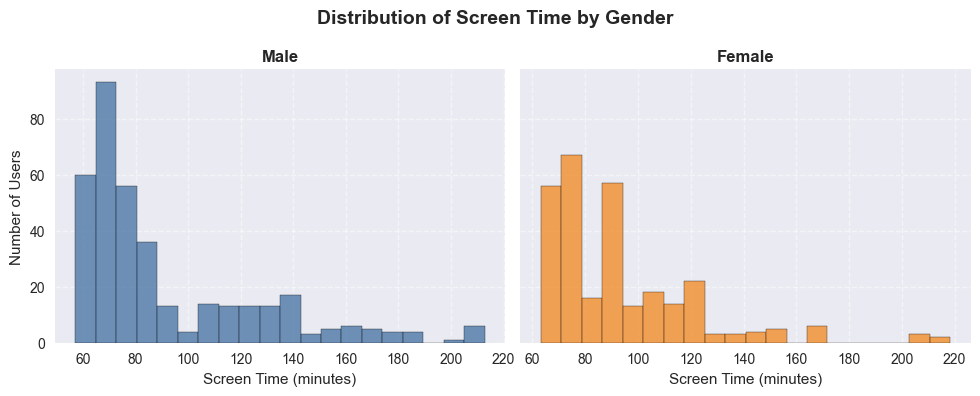

In [88]:
# 3: Histogram

# Split the figure into two histograms side-by-side
fig, axes = plt.subplots(1, 2, figsize=(10,4), sharey=True)

# Male
axes[0].hist(df[df["gender"]=="Male"]["screen_time_min"], bins=20, color="#4E79A7", alpha=0.8, edgecolor='black')
axes[0].set_title("Male", fontsize=12, fontweight='bold')
axes[0].set_xlabel("Screen Time (minutes)")
axes[0].set_ylabel("Number of Users")
axes[0].grid(True, linestyle='--', alpha=0.5)

# Female
axes[1].hist(df[df["gender"]=="Female"]["screen_time_min"], bins=20, color="#F28E2B", alpha=0.8, edgecolor='black')
axes[1].set_title("Female", fontsize=12, fontweight='bold')
axes[1].set_xlabel("Screen Time (minutes)")
axes[1].grid(True, linestyle='--', alpha=0.5)

# General title
fig.suptitle("Distribution of Screen Time by Gender", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [89]:
# 4. Pie chart – category distribution
colors = ["#FF9999", "#66B2FF", "#99FF99", "#FFCC99", "#C2C2F0", "#FFD580"]
# count how many apps in each category
category_counts = df["category"].value_counts()

plt.figure(figsize=(6.5, 6.5))

plt.pie(
    category_counts,
    labels=category_counts.index,               # category names
    autopct="%1.0f%%",                          # show percent
    startangle=90,                              # start from top for symmetry
    colors=colors[:len(category_counts)],       # use only needed colors
    shadow=True,                                # light shadow
    explode=[0.05] * len(category_counts),      # small gap for all slices
    textprops={"fontsize": 11, "color": "#333"} # readable labels
)

plt.title("App Category Distribution", fontsize=14, fontweight="bold", pad=15)
plt.axis("equal")
plt.show()

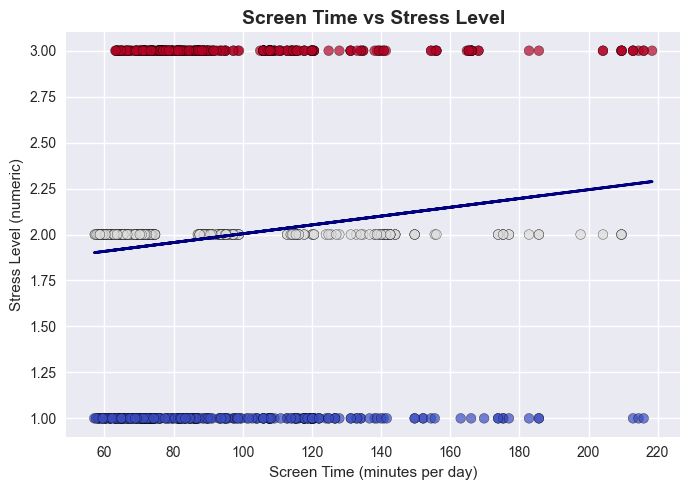

In [93]:
# 5: Scatter Plot
# Users with higher screen time tend to report higher stress levels.

x = df['screen_time_min']       # وقت استخدام الهاتف/التطبيق بالدقائق
y = df['stress_level_num']      # مستوى التوتر كقيمة رقمية

plt.figure(figsize=(7,5))
plt.scatter(x, y, c=y, cmap='coolwarm', edgecolor='black', alpha=0.7)

# خط الانحدار
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='navy', linewidth=2)

plt.title("Screen Time vs Stress Level", fontsize=14, fontweight='bold')
plt.xlabel("Screen Time (minutes per day)")
plt.ylabel("Stress Level (numeric)")
plt.tight_layout()
plt.show()

In [94]:
# 6 Box plot: compare sleep hours across mental health status
plt.figure(figsize=(6,5))
df.boxplot(
    column="sleep_hours",             
    by="mental_health_status",         
    patch_artist=True,
    boxprops=dict(facecolor="#A7C7E7", color="black"),
    medianprops=dict(color="red", linewidth=2)
)

plt.title("Sleep Hours by Mental Health Status", fontsize=14, fontweight='bold')
plt.suptitle("")  # remove pandas default title
plt.xlabel("Mental Health Status (Good / Average / Poor)", fontsize=11)
plt.ylabel("Sleep Hours (per day)", fontsize=11)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


<Figure size 600x500 with 0 Axes>

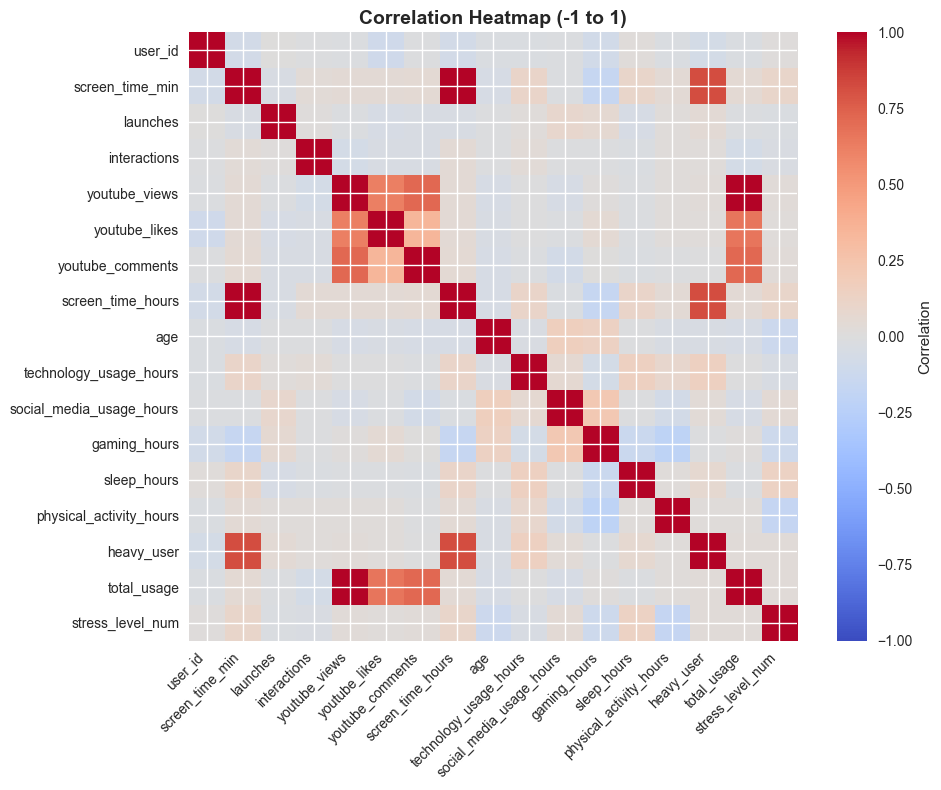

In [98]:
#  7 Correlation Heatmap
corr = df.select_dtypes(include='number').corr()

plt.figure(figsize=(10, 8))
plt.imshow(corr, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(label="Correlation")

plt.xticks(range(len(corr.columns)), corr.columns, rotation=45, ha='right')
plt.yticks(range(len(corr.columns)), corr.columns)

plt.title("Correlation Heatmap (-1 to 1)", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

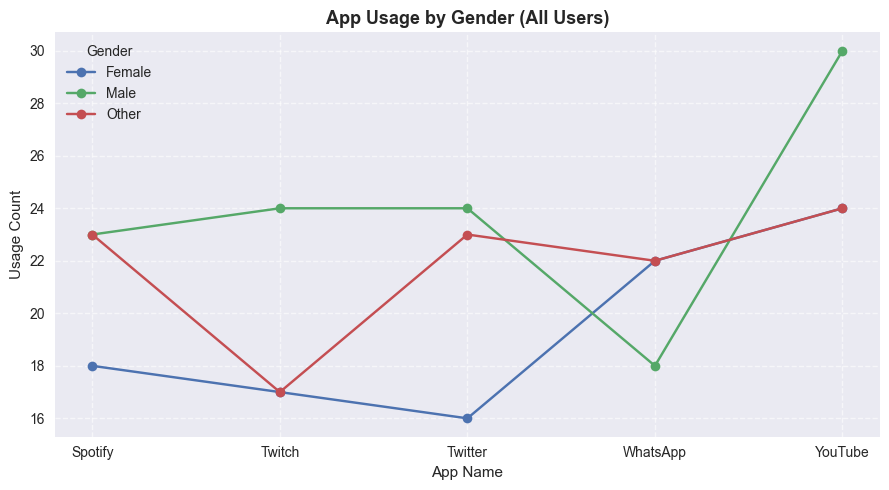

In [100]:
gender_app = df.groupby(["gender", "app_name"]).size().reset_index(name="usage_count")
# نختار أكثر 5 تطبيقات استخدامًا فقط لسهولة العرض
top_apps = gender_app.groupby("app_name")["usage_count"].sum().nlargest(5).index
gender_app = gender_app[gender_app["app_name"].isin(top_apps)]

plt.figure(figsize=(9,5))
for g in gender_app["gender"].unique():
    subset = gender_app[gender_app["gender"] == g]
    plt.plot(subset["app_name"], subset["usage_count"], marker='o', label=g)

plt.title("App Usage by Gender (All Users)", fontsize=13, fontweight='bold')
plt.xlabel("App Name")
plt.ylabel("Usage Count")
plt.legend(title="Gender")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

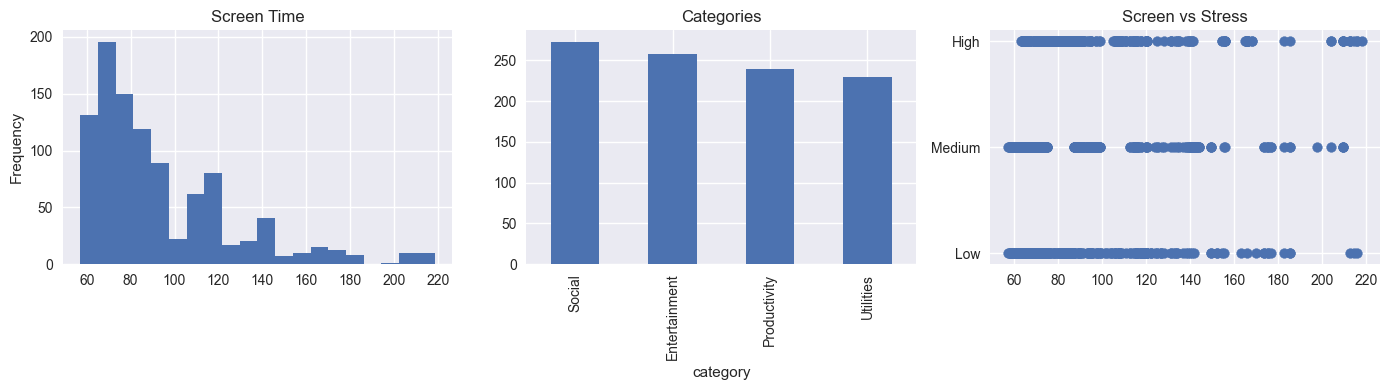

In [129]:
# Creates three plots side by side:
# 1) Histogram of screen time
# 2) Bar chart of category counts
# 3) Scatter plot showing relationship between screen time and stress level

fig, axs = plt.subplots(1, 3, figsize=(14,4))

df['screen_time_min'].plot(kind='hist', bins=20, ax=axs[0], title='Screen Time')
df['category'].value_counts().plot(kind='bar', ax=axs[1], title='Categories')
axs[2].scatter(df['screen_time_min'], df['stress_level'])
axs[2].set_title('Screen vs Stress')

plt.tight_layout()
plt.show()

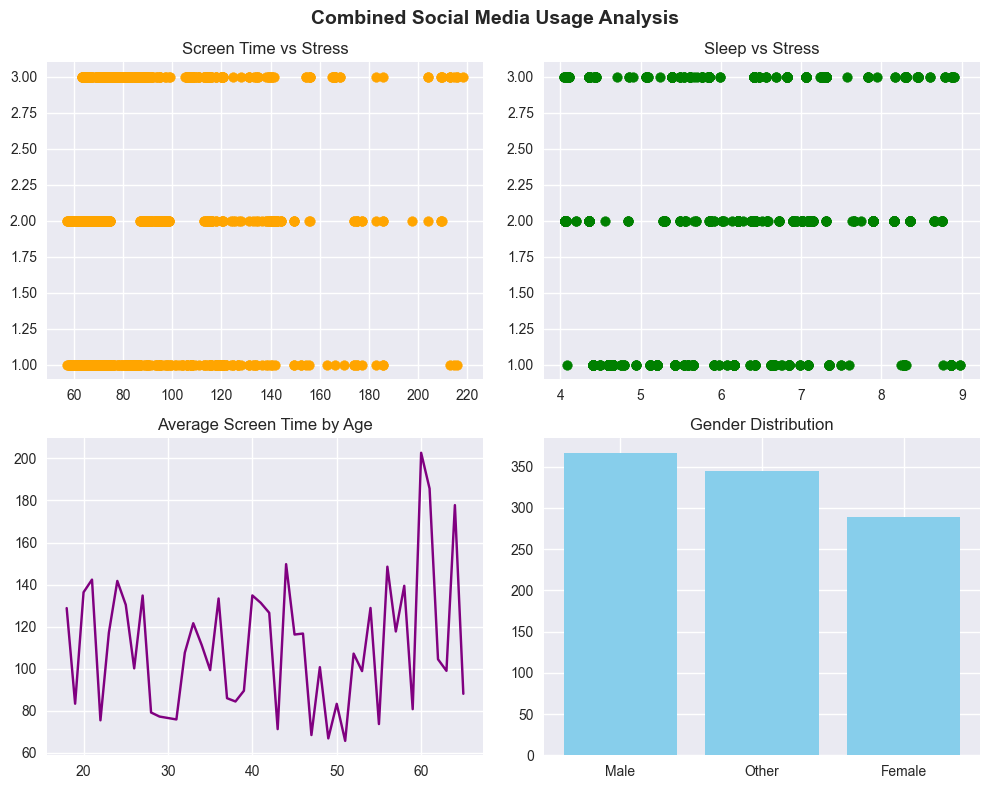

In [104]:

fig, axes = plt.subplots(2, 2, figsize=(10,8))

axes[0,0].scatter(df['screen_time_min'], df['stress_level_num'], color='orange')
axes[0,0].set_title("Screen Time vs Stress")

axes[0,1].scatter(df['sleep_hours'], df['stress_level_num'], color='green')
axes[0,1].set_title("Sleep vs Stress")

axes[1,0].plot(df.groupby('age')['screen_time_min'].mean(), color='purple')
axes[1,0].set_title("Average Screen Time by Age")

axes[1,1].bar(df['gender'].value_counts().index, df['gender'].value_counts().values, color='skyblue')
axes[1,1].set_title("Gender Distribution")

fig.suptitle("Combined Social Media Usage Analysis", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


In [112]:
# المعادلة: (sleep_hours - social_media_usage_hours) / (stress_level_num + 1)


df["digital_wellbeing_index"] = (
    (df["sleep_hours"] - df["social_media_usage_hours"]) /
    (df["stress_level_num"] + 1)
)

df.head()

user_id                          date     app_name      category  \
56       1081 2024-01-04 22:40:17.605868622        Slack  Productivity   
610      1053 2024-01-24 16:01:45.635211737    Instagram        Social   
1662     1079 2024-03-04 03:28:23.367789263       Notion  Productivity   
1010     1076 2024-02-06 12:04:33.691230410     WhatsApp        Social   
2416     1034 2024-03-27 18:46:27.329109703  Google Docs  Productivity   

      screen_time_min  launches  interactions  is_productive  youtube_views  \
56              61.13         1             3           True  232223.415094   
610             74.35         1             2          False  232223.415094   
1662           112.84         1             5           True  232223.415094   
1010            61.69         5             6          False  232223.415094   
2416           106.11         0             5           True  232223.415094   

      youtube_likes  ...  stress_level  sleep_hours physical_activity_hours  \
56     12724.830189  ...           Low         4.66                    4.93   
610    12724.830189  ...        Medium         7.10                    1.29   
1662   12724.830189  ...        Medium         6.57                    5.77   
1010   12724.830189  ...        Medium         6.21                    0.33   
2416   12724.830189  ...          High         5.39                    4.45   

      support_systems_access work_environment_impact  online_support_usage  \
56                        No                Negative                    No   
610                      Yes                Negative                    No   
1662                      No                Positive                    No   
1010                     Yes                Positive                    No   
2416                     Yes                 Neutral                    No   

      heavy_user    total_usage stress_level_num digital_wellbeing_index  
56             0  248565.444843                1                1.865000  
610            0  248597.134843                2                0.046667  
1662           0  248630.274843                2               -0.210000  
1010           0  248590.094843                2                0.706667  
2416           0  248596.624843                3                1.027500  

[5 rows x 29 columns]

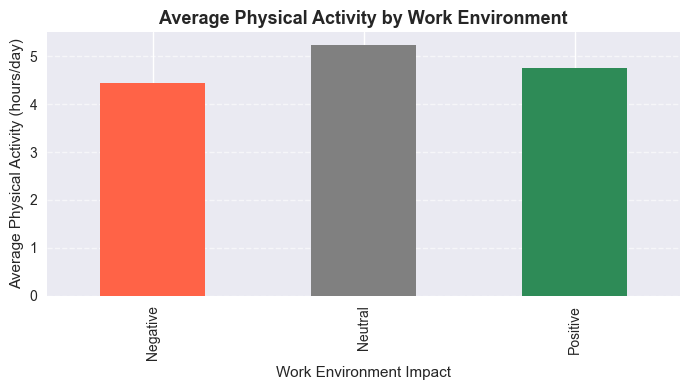

In [116]:
avg_activity = df.groupby("work_environment_impact")["physical_activity_hours"].mean()

plt.figure(figsize=(7,4))
avg_activity.plot(kind="bar", color=['tomato','gray','seagreen'])
plt.title("Average Physical Activity by Work Environment", fontsize=13, fontweight='bold')
plt.xlabel("Work Environment Impact")
plt.ylabel("Average Physical Activity (hours/day)")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [121]:

avg_tech = df.groupby("mental_health_status")["technology_usage_hours"].mean().sort_values()

plt.figure(figsize=(7,4))
avg_tech.plot(kind='bar', color=['seagreen','gold','tomato'])
plt.title("Average Technology Usage by Mental Health Status", fontsize=13, fontweight='bold')
plt.xlabel("Mental Health Status")
plt.ylabel("Average Technology Usage (hours/day)")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [124]:
print("""
         Final Insight Summary

The analysis shows that higher screen time and longer technology use 
are linked to higher stress and less sleep.

In contrast, users with a positive work environment and regular physical activity 
show better digital well-being.

Maintaining balance between technology use, rest, and activity 
is essential for a healthy lifestyle.
""")



         Final Insight Summary

The analysis shows that higher screen time and longer technology use 
are linked to higher stress and less sleep.

In contrast, users with a positive work environment and regular physical activity 
show better digital well-being.

Maintaining balance between technology use, rest, and activity 
is essential for a healthy lifestyle.



In [125]:
df.to_csv("cleaned_dataset.csv", index=False)